# VIDEO GAME SALES (EDA)

## INTRODUCTION

> *Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales, this data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900(KAGGLE)*

The aim of the project was to present an exploratory analysis of video game sales. We examined which games were the most sold in Japan, Europe, etc. As well as what are the best-selling games on the main platforms.

## 1. IMPORTING AND PREPARING THE DATA

In [1]:
# Import the libraries
library(tidyverse)
library(PerformanceAnalytics)
library(summarytools)
library(gridExtra)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'xts'


The following objects are masked from 'package:dplyr':

    first, last



Attaching package: 'PerformanceAnalytics'


The following object is masked from 'package:graphics':

    legend


Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp

For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')


Attaching package:

In [2]:
# Read the data
df_games<- read.csv("Video_Games_Sales_as_at_22_Dec_2016.csv", header=T, sep=",", dec=".")

In [3]:
# Check for missing values
f=function(x){any(is.na(x))}
check.na=apply(df_games,2,f);
check.na

Name        Platform Year_of_Release           Genre       Publisher 
          FALSE           FALSE           FALSE           FALSE           FALSE 
       NA_Sales        EU_Sales        JP_Sales     Other_Sales    Global_Sales 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   Critic_Score    Critic_Count      User_Score      User_Count       Developer 
           TRUE            TRUE            TRUE            TRUE           FALSE 
         Rating 
          FALSE

In [4]:
# Summary of dataset
summary(df_games)

     Name             Platform         Year_of_Release       Genre          
 Length:16719       Length:16719       Length:16719       Length:16719      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  Publisher            NA_Sales          EU_Sales         JP_Sales      
 Length:16719       Min.   : 0.0000   Min.   : 0.000   Min.   : 0.0000  
 Class :character   1st Qu.: 0.0000   1st Qu.: 0.000   1st Qu.: 0.0000  
 Mode  :character   Median : 0.0800   Median : 0.020   Median : 0.0000  
                    Mean   : 0.2633   Mean   : 0.145   Mean   : 0.0776  
                   

In [5]:
# Transform variables
df_games$Platform<- factor(df_games$Platform)
df_games$Genre<- factor(df_games$Genre)
df_games$Publisher<- factor(df_games$Publisher)
df_games$Developer<- factor(df_games$Developer)
df_games$Rating<- factor(df_games$Rating)
df_games$Year_of_Release<- as.Date(df_games$Year_of_Release, format="%Y")

In [6]:
# Examining Data
glimpse(df_games)

Rows: 16,719
Columns: 16
$ Name            <chr> "Wii Sports", "Super Mario Bros.", "Mario Kart Wii"...
$ Platform        <fct> Wii, NES, Wii, Wii, GB, GB, DS, Wii, Wii, NES, DS, ...
$ Year_of_Release <date> 2006-02-16, 1985-02-16, 2008-02-16, 2009-02-16, 19...
$ Genre           <fct> Sports, Platform, Racing, Sports, Role-Playing, Puz...
$ Publisher       <fct> Nintendo, Nintendo, Nintendo, Nintendo, Nintendo, N...
$ NA_Sales        <dbl> 41.36, 29.08, 15.68, 15.61, 11.27, 23.20, 11.28, 13...
$ EU_Sales        <dbl> 28.96, 3.58, 12.76, 10.93, 8.89, 2.26, 9.14, 9.18, ...
$ JP_Sales        <dbl> 3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.50, 2.93, 4....
$ Other_Sales     <dbl> 8.45, 0.77, 3.29, 2.95, 1.00, 0.58, 2.88, 2.84, 2.2...
$ Global_Sales    <dbl> 82.53, 40.24, 35.52, 32.77, 31.37, 30.26, 29.80, 28...
$ Critic_Score    <int> 76, NA, 82, 80, NA, NA, 89, 58, 87, NA, NA, 91, NA,...
$ Critic_Count    <int> 51, NA, 73, 73, NA, NA, 65, 41, 80, NA, NA, 64, NA,...
$ User_Score      <dbl> 8.0

In [7]:
# Visualising first six lines
head(df_games)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
,<chr>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,Wii Sports,Wii,2006-02-16,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
2,Super Mario Bros.,NES,1985-02-16,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NA,NA,NA,NA,,
3,Mario Kart Wii,Wii,2008-02-16,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
4,Wii Sports Resort,Wii,2009-02-16,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
5,Pokemon Red/Pokemon Blue,GB,1996-02-16,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NA,NA,NA,NA,,
6,Tetris,GB,1989-02-16,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NA,NA,NA,NA,,


In [8]:
# Visualising last six lines
tail(df_games)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
,<chr>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
16714,SCORE International Baja 1000: The Official Game,PS2,2008-02-16,Racing,Activision,0.00,0.00,0.00,0,0.01,NA,NA,NA,NA,,
16715,Samurai Warriors: Sanada Maru,PS3,2016-02-16,Action,Tecmo Koei,0.00,0.00,0.01,0,0.01,NA,NA,NA,NA,,
16716,LMA Manager 2007,X360,2006-02-16,Sports,Codemasters,0.00,0.01,0.00,0,0.01,NA,NA,NA,NA,,
16717,Haitaka no Psychedelica,PSV,2016-02-16,Adventure,Idea Factory,0.00,0.00,0.01,0,0.01,NA,NA,NA,NA,,
16718,Spirits & Spells,GBA,2003-02-16,Platform,Wanadoo,0.01,0.00,0.00,0,0.01,NA,NA,NA,NA,,
16719,Winning Post 8 2016,PSV,2016-02-16,Simulation,Tecmo Koei,0.00,0.00,0.01,0,0.01,NA,NA,NA,NA,,


In [9]:
# Summary statistics
df_games %>%
summarytools::descr(stats = "common")

,Critic_Count,Critic_Score,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales,User_Count,User_Score
Mean,26.36082,68.96768,1.450248e-01,5.335427e-01,7.760213e-02,2.633303e-01,4.733178e-02,162.22991,7.125046
Std.Dev,18.98049,13.93816,5.032833e-01,1.547935e+00,3.088181e-01,8.135138e-01,1.867099e-01,561.28233,1.500006
Min,3.00000,13.00000,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,4.00000,0.000000
Median,21.00000,71.00000,2.000000e-02,1.700000e-01,0.000000e+00,8.000000e-02,1.000000e-02,24.00000,7.500000
Max,113.00000,98.00000,2.896000e+01,8.253000e+01,1.022000e+01,4.136000e+01,1.057000e+01,10665.00000,9.700000
N.Valid,8137.00000,8137.00000,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04,7590.00000,7590.000000
Pct.Valid,48.66918,48.66918,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,45.39745,45.397452


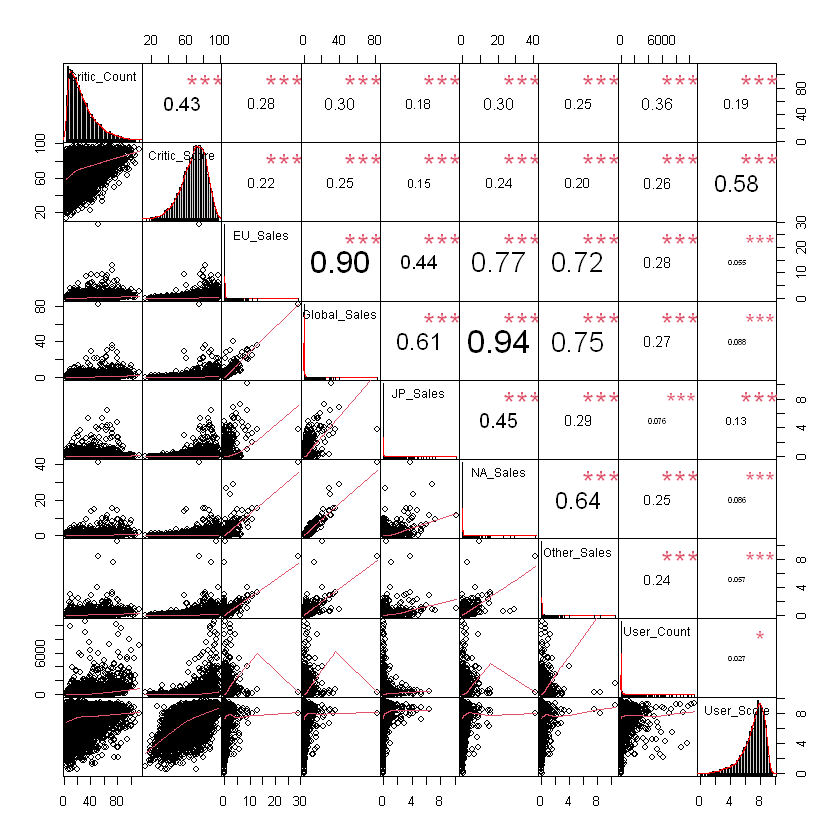

In [10]:
# Visualization of Correlation Matrix
df_games %>%
  select(Critic_Count, Critic_Score, EU_Sales, Global_Sales,
          JP_Sales, NA_Sales, Other_Sales, User_Count, User_Score) %>%
  chart.Correlation()

## 2. EXPLORATORY DATA ANALISYS

<h3>2.1 GAMES SALES</h3>

### TOP 10 GLOBAL SALES

In [11]:
# View TOP 10 Global Sales
df_games %>%
arrange(desc(Global_Sales)) %>%
head(n=10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
,<chr>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,Wii Sports,Wii,2006-02-16,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
2,Super Mario Bros.,NES,1985-02-16,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NA,NA,NA,NA,,
3,Mario Kart Wii,Wii,2008-02-16,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
4,Wii Sports Resort,Wii,2009-02-16,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
5,Pokemon Red/Pokemon Blue,GB,1996-02-16,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NA,NA,NA,NA,,
6,Tetris,GB,1989-02-16,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NA,NA,NA,NA,,
7,New Super Mario Bros.,DS,2006-02-16,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,E
8,Wii Play,Wii,2006-02-16,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E
9,New Super Mario Bros. Wii,Wii,2009-02-16,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87,80,8.4,594,Nintendo,E


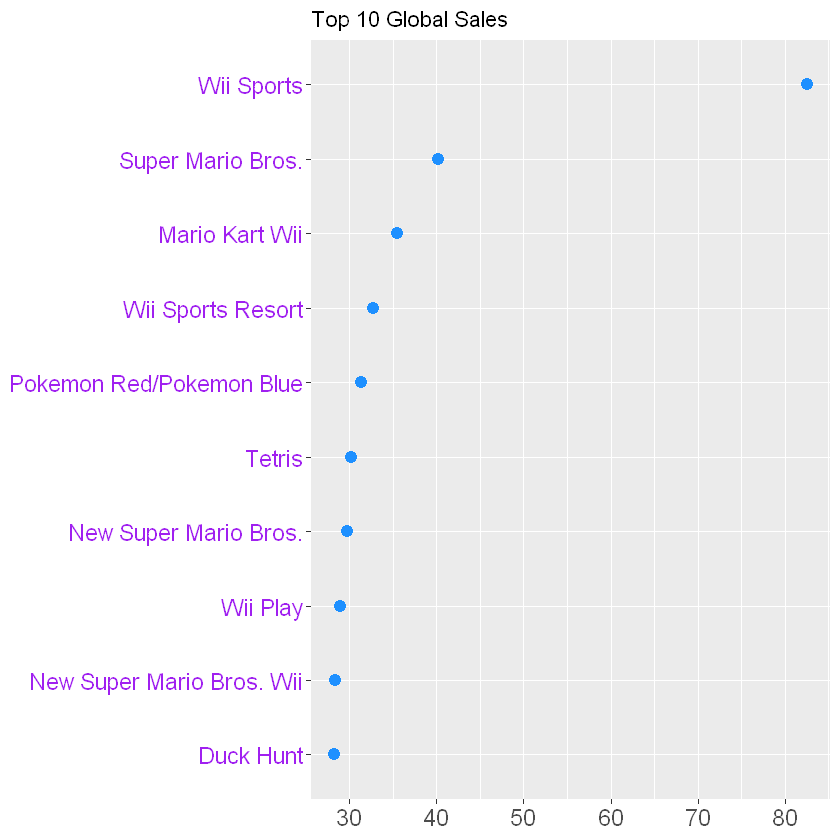

In [12]:
df_games %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
ggplot(aes(x = Global_Sales, y = reorder(Name, Global_Sales))) +
geom_point(size = 3, color = "dodgerblue") +
theme(axis.text.y=element_text(size=14, colour="purple"),
      axis.text.x=element_text(size=14)) +
labs(x=NULL, y=NULL, title= "Top 10 Global Sales")

### TOP 10 NORTH AMERICA SALES

In [13]:
# View TOP 10 North America Sales
df_games %>%
arrange(desc(NA_Sales)) %>%
head(n=10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
,<chr>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,Wii Sports,Wii,2006-02-16,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
2,Super Mario Bros.,NES,1985-02-16,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NA,NA,NA,NA,,
3,Duck Hunt,NES,1984-02-16,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NA,NA,NA,NA,,
4,Tetris,GB,1989-02-16,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NA,NA,NA,NA,,
5,Mario Kart Wii,Wii,2008-02-16,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
6,Wii Sports Resort,Wii,2009-02-16,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
7,Kinect Adventures!,X360,2010-02-16,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61,45,6.3,106,Good Science Studio,E
8,New Super Mario Bros. Wii,Wii,2009-02-16,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87,80,8.4,594,Nintendo,E
9,Wii Play,Wii,2006-02-16,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E


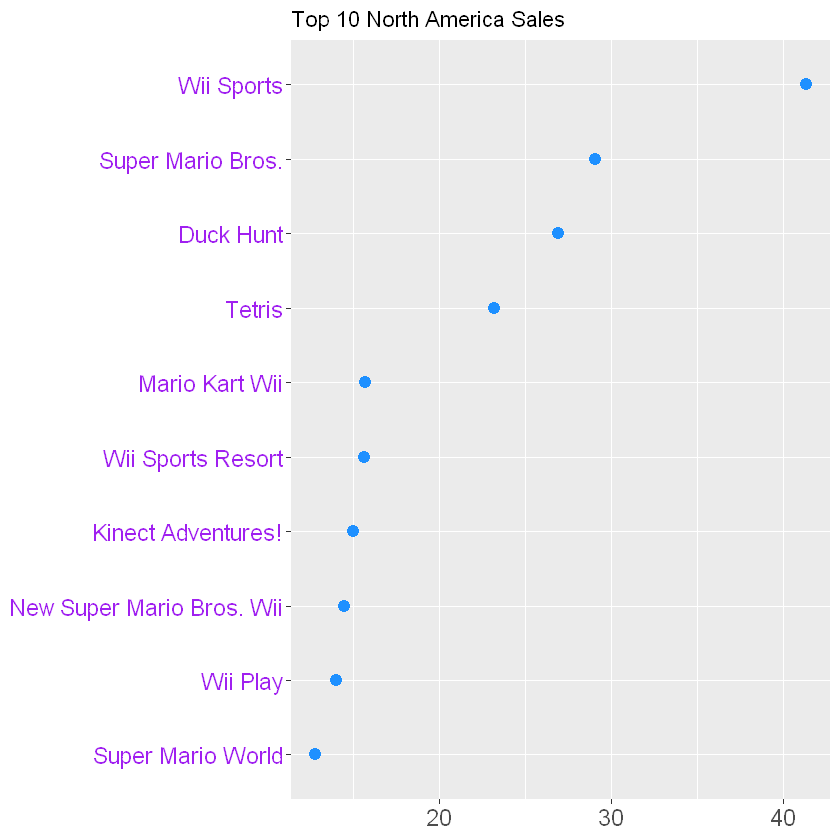

In [14]:
df_games %>%
arrange(desc(NA_Sales)) %>%
head(n=10) %>%
ggplot(aes(x = NA_Sales, y = reorder(Name, NA_Sales))) +
geom_point(size = 3, color = "dodgerblue") +
theme(axis.text.y=element_text(size=14, colour="purple"),
      axis.text.x=element_text(size=14)) +
labs(x=NULL, y=NULL, title= "Top 10 North America Sales")

### TOP 10 JAPAN SALES

In [15]:
# View TOP 10 Japan Sales
df_games %>%
arrange(desc(JP_Sales)) %>%
head(n=10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
,<chr>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,Pokemon Red/Pokemon Blue,GB,1996-02-16,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NA,NA,NA,NA,,
2,Pokemon Gold/Pokemon Silver,GB,1999-02-16,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NA,NA,NA,NA,,
3,Super Mario Bros.,NES,1985-02-16,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NA,NA,NA,NA,,
4,New Super Mario Bros.,DS,2006-02-16,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,E
5,Pokemon Diamond/Pokemon Pearl,DS,2006-02-16,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,18.25,NA,NA,NA,NA,,
6,Pokemon Black/Pokemon White,DS,2010-02-16,Role-Playing,Nintendo,5.51,3.17,5.65,0.80,15.14,NA,NA,NA,NA,,
7,Pokemon Ruby/Pokemon Sapphire,GBA,2002-02-16,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,NA,NA,NA,NA,,
8,Animal Crossing: Wild World,DS,2005-02-16,Simulation,Nintendo,2.50,3.45,5.33,0.86,12.13,86,57,8.7,242,Nintendo,E
9,Brain Age 2: More Training in Minutes a Day,DS,2005-02-16,Puzzle,Nintendo,3.43,5.35,5.32,1.18,15.29,77,37,7.1,19,Nintendo,E


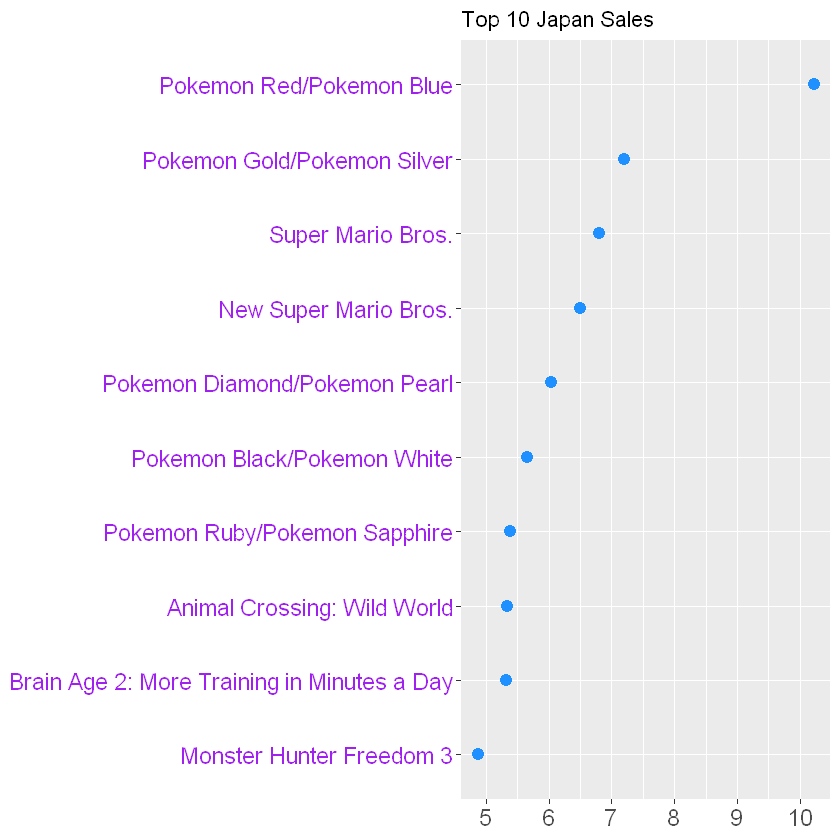

In [16]:
df_games %>%
arrange(desc(JP_Sales)) %>%
head(n=10) %>%
ggplot(aes(x = JP_Sales, y = reorder(Name, JP_Sales))) +
geom_point(size = 3, color = "dodgerblue") +
theme(axis.text.y=element_text(size=14, colour="purple"),
      axis.text.x=element_text(size=14)) +
labs(x=NULL, y=NULL, title= "Top 10 Japan Sales")

### TOP 10 EUROPE SALES

In [17]:
# View TOP 10 Europe Sales
df_games %>%
arrange(desc(EU_Sales)) %>%
head(n=10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
,<chr>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,Wii Sports,Wii,2006-02-16,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008-02-16,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Nintendogs,DS,2005-02-16,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NA,NA,NA,NA,,
4,Wii Sports Resort,Wii,2009-02-16,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
5,Brain Age: Train Your Brain in Minutes a Day,DS,2005-02-16,Misc,Nintendo,4.74,9.20,4.16,2.04,20.15,77,58,7.9,50,Nintendo,E
6,Wii Play,Wii,2006-02-16,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E
7,New Super Mario Bros.,DS,2006-02-16,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,E
8,Grand Theft Auto V,PS3,2013-02-16,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97,50,8.2,3994,Rockstar North,M
9,Pokemon Red/Pokemon Blue,GB,1996-02-16,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NA,NA,NA,NA,,


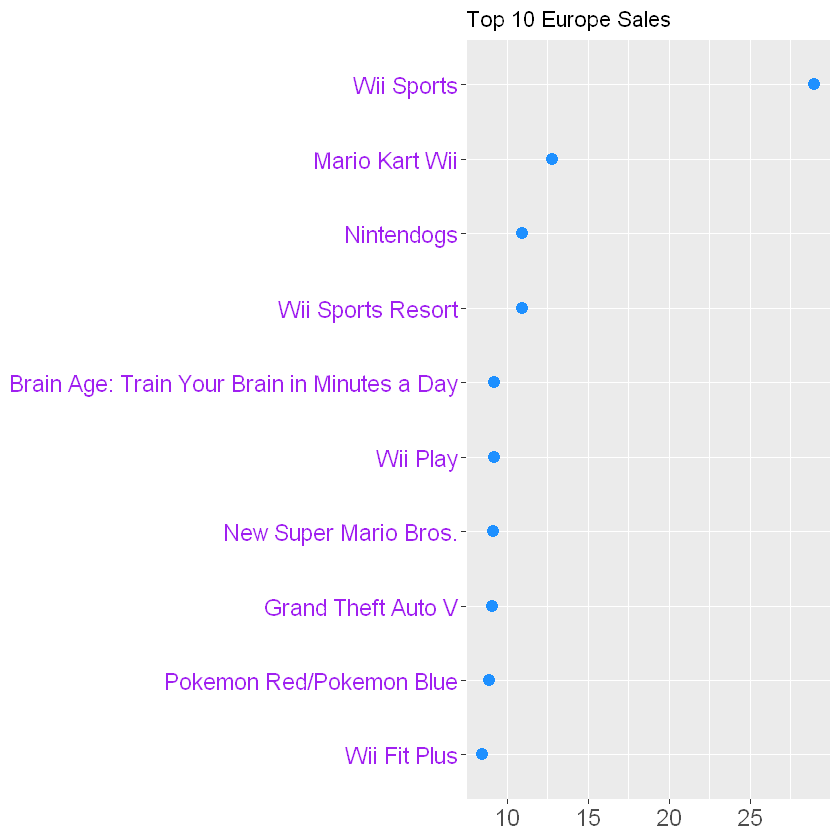

In [18]:
df_games %>%
arrange(desc(EU_Sales)) %>%
head(n=10) %>%
ggplot(aes(x = EU_Sales, y = reorder(Name, EU_Sales))) +
geom_point(size = 3, color = "dodgerblue") +
theme(axis.text.y=element_text(size=14, colour="purple"),
      axis.text.x=element_text(size=14)) +
labs(x=NULL, y=NULL, title= "Top 10 Europe Sales")

In [19]:
# View TOP 10 Other Sales
df_games %>%
arrange(desc(Other_Sales)) %>%
head(n=10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
,<chr>,<fct>,<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,Grand Theft Auto: San Andreas,PS2,2004-02-16,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95,80,9.0,1588,Rockstar North,M
2,Wii Sports,Wii,2006-02-16,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
3,Gran Turismo 4,PS2,2004-02-16,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66,89,74,8.5,272,Polyphony Digital,E
4,Grand Theft Auto V,PS3,2013-02-16,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97,50,8.2,3994,Rockstar North,M
5,Mario Kart Wii,Wii,2008-02-16,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
6,Wii Sports Resort,Wii,2009-02-16,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
7,Pro Evolution Soccer 2008,PS2,2007-02-16,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.63,82,10,7.9,38,Konami,E
8,New Super Mario Bros.,DS,2006-02-16,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,E
9,Wii Play,Wii,2006-02-16,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E


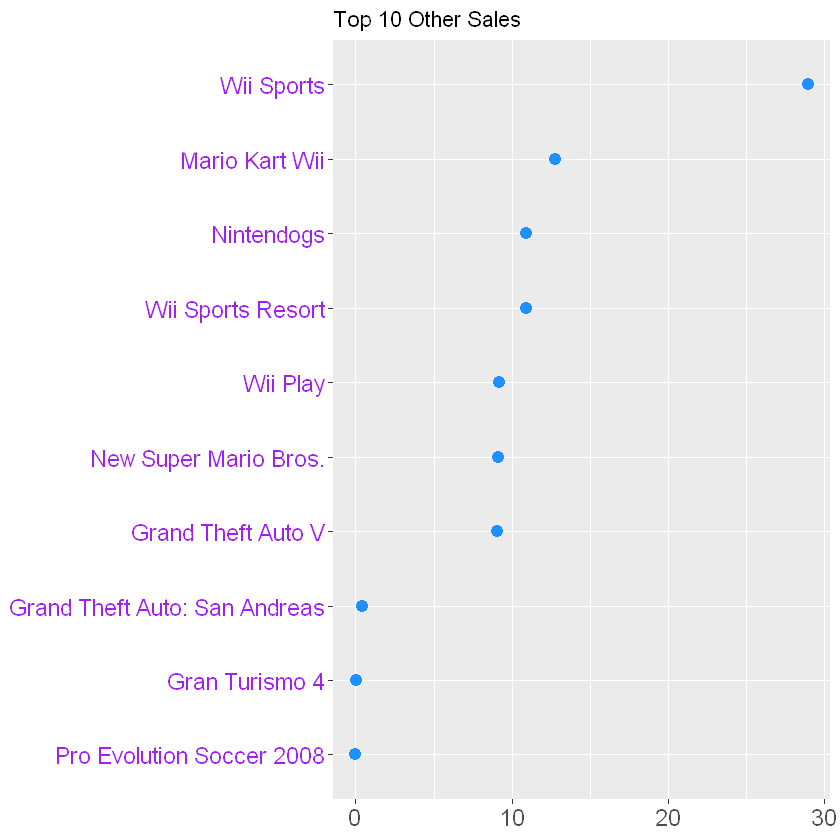

In [20]:
df_games %>%
arrange(desc(Other_Sales)) %>%
head(n=10) %>%
ggplot(aes(x = EU_Sales, y = reorder(Name, EU_Sales))) +
geom_point(size = 3, color = "dodgerblue") +
theme(axis.text.y=element_text(size=14, colour="purple"),
      axis.text.x=element_text(size=14)) +
labs(x=NULL, y=NULL, title= "Top 10 Other Sales")

### 2.2 BEST SALES PER PLATFORM

### BEST SELLING SONY GAMES

**Playstation**
1. Grand Turismo
2. Final Fantasy VII
3. Gran Turismo 2

**Playstation 2**
1. Grand Theft Auto: San Andreas
2. Grand Theft Auto: Vice City
3. Grand Turismo 3: A-Spec

**Playstation 3**
1. Grand Theft Auto V
2. Call of Duty: Black Ops II
3. Call of Duty: Modern Warfare 3

**Playstation 4**
1. Call of Duty: Black Ops 3
2. Grand Theft Auto V
3. Fifa 2016

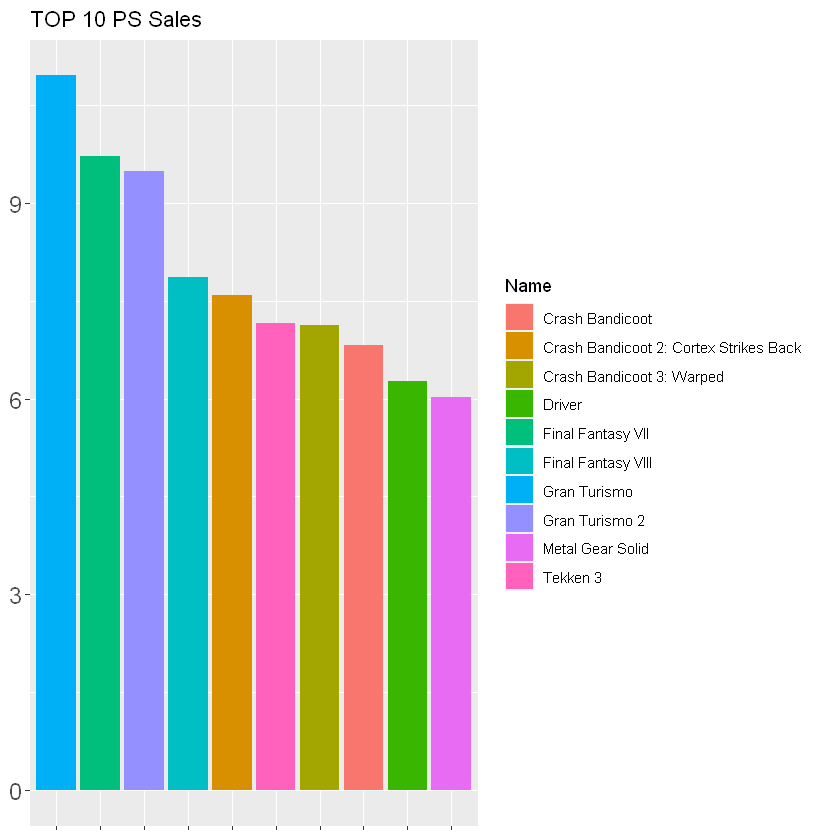

In [21]:
# View TOP 10 PS Sales
df_games %>%
filter(Platform=="PS") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank(),
       axis.text.y = element_text(size = 14)) +
labs(x=NULL, y=NULL, title="TOP 10 PS Sales")

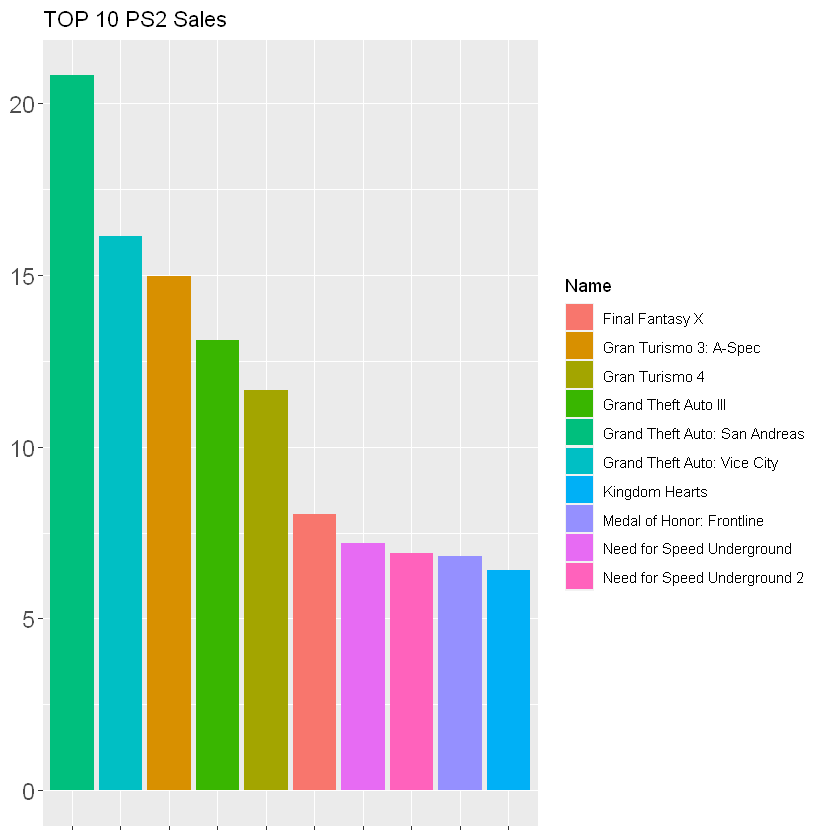

In [22]:
# View TOP 10 PS2 Sales
df_games %>%
filter(Platform=="PS2") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank(),
      axis.text.y = element_text(size = 14)) +
labs(x=NULL, y=NULL, title="TOP 10 PS2 Sales")

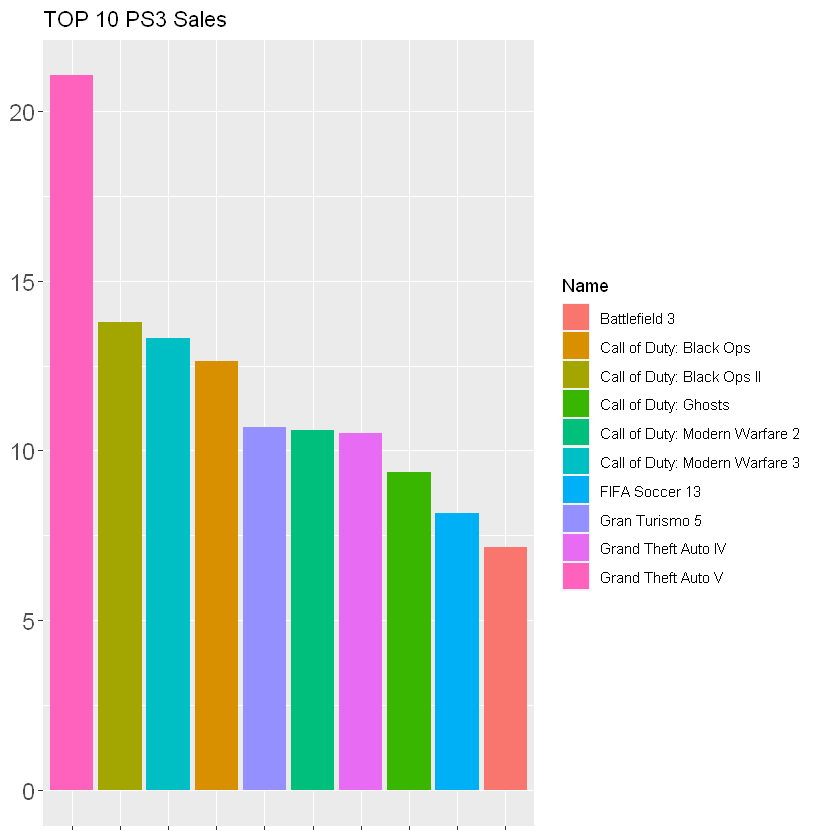

In [23]:
# View TOP 10 PS3 Sales
df_games %>%
filter(Platform=="PS3") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank(),
      axis.text.y = element_text(size = 14)) +
labs(x=NULL, y=NULL, title="TOP 10 PS3 Sales")

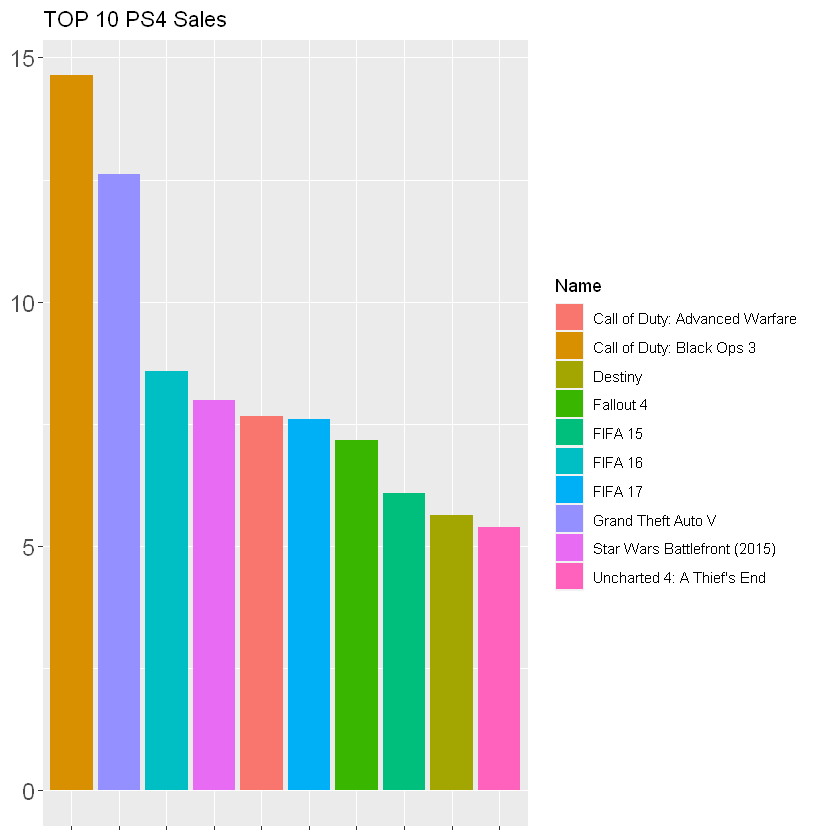

In [24]:
# View TOP 10 PS4 Sales
df_games %>%
filter(Platform=="PS4") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank(),
      axis.text.y = element_text(size = 14)) +
labs(x=NULL, y=NULL, title="TOP 10 PS4 Sales")

### BEST SELLING NINTENDO GAMES

**Nintendo Entertainment System**
1. Super Mario Bros.
2. Duck Hunt
3. Super Mario Bros. 3

**Super Nintendo Entertainment System**
1. Super Mario World
2. Super Mario All-Stars
3. Donkey Kong Country

**Nintendo 64**
1. Super Mario 64
2. Mario Kart 64
3. GoldenEye 007

**Nintendo GameCube**
1. Super Smash Bros. Melee
2. Mario Kart: Double Dash!
3. Super Mario Sunshine

**Nintendo Wii**
1. Wii Sports
2. Mario Kart Wii
3. Wii Sports Resort

**Nintendo Wii U**
1. Mario Kart 8
2. New Super Mario Bros. U
3. Super Smash Bros.


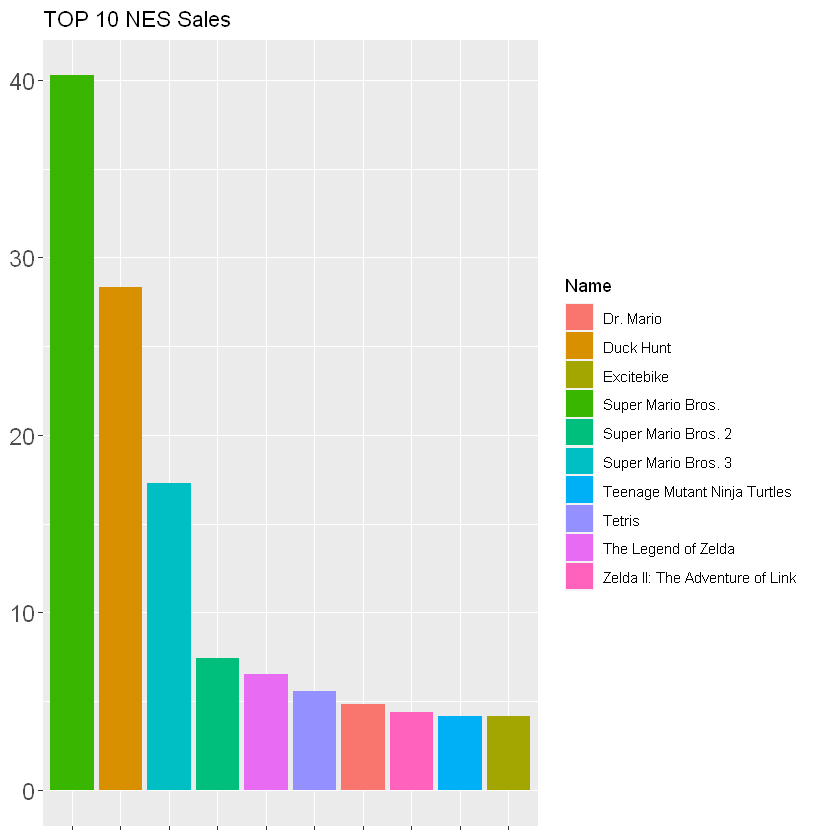

In [25]:
# View TOP 10 NES Sales
df_games %>%
filter(Platform=="NES") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank(),
      axis.text.y = element_text(size = 14)) +
labs(x=NULL, y=NULL, title="TOP 10 NES Sales")

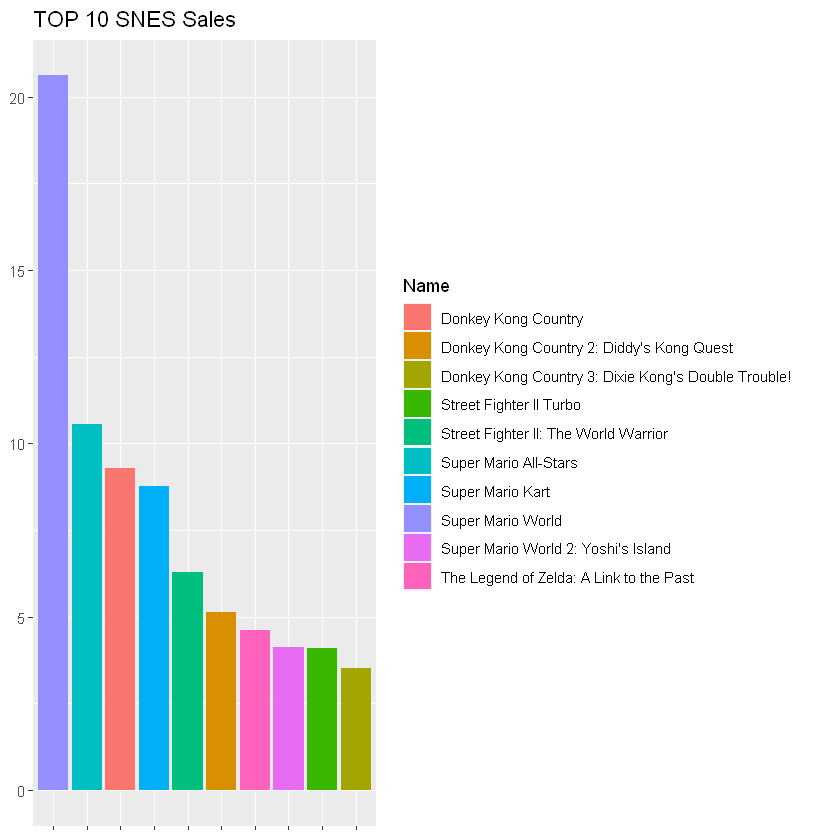

In [26]:
# View TOP 10 SNES Sales
df_games %>%
filter(Platform=="SNES") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank()) +
labs(x=NULL, y=NULL, title="TOP 10 SNES Sales")

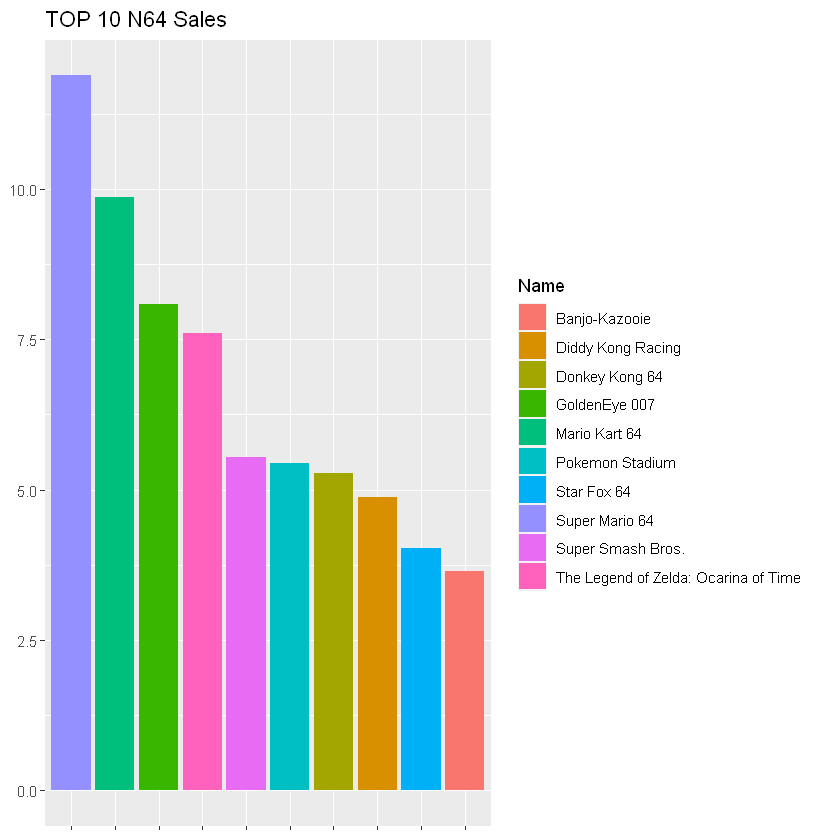

In [27]:
# View TOP 10 N64 Sales
df_games %>%
filter(Platform=="N64") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank()) +
labs(x=NULL, y=NULL, title="TOP 10 N64 Sales")

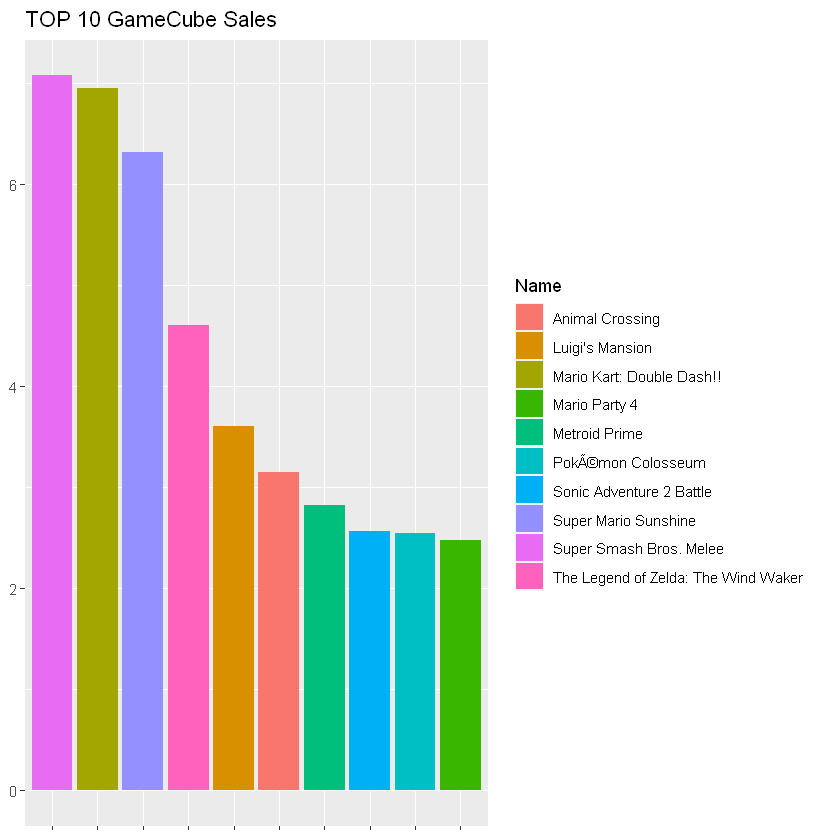

In [28]:
# View TOP 10 GameCube Sales
df_games %>%
filter(Platform=="GC") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank()) +
labs(x=NULL, y=NULL, title="TOP 10 GameCube Sales")

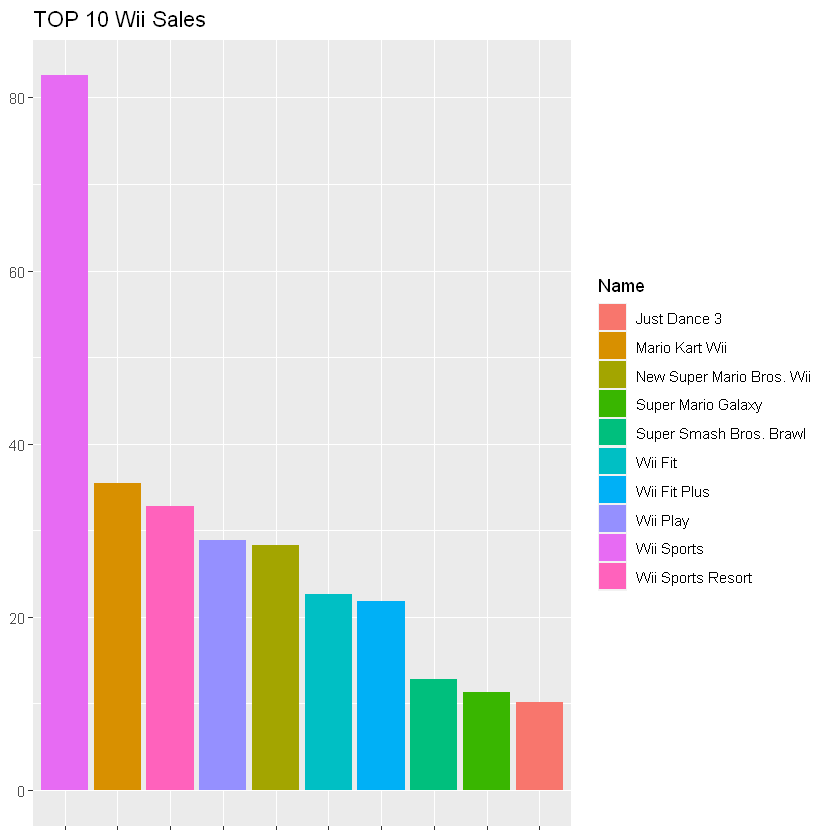

In [29]:
# View TOP 10 Wii Sales
df_games %>%
filter(Platform=="Wii") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank()) +
labs(x=NULL, y=NULL, title="TOP 10 Wii Sales")

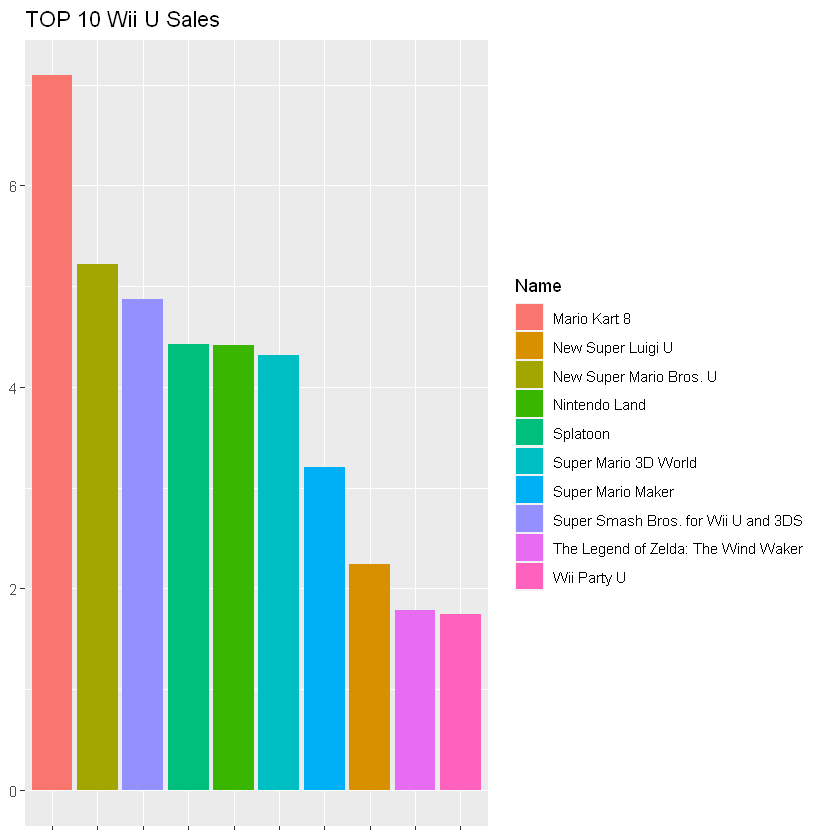

In [30]:
# View TOP 10 Wii U Sales
df_games %>%
filter(Platform=="WiiU") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank()) +
labs(x=NULL, y=NULL, title="TOP 10 Wii U Sales")

### BEST SELLING MICROSOFT GAMES

**Xbox**
1. Halo 2
2. Halo: Combat Evolved
3. Tom Clancy´s Splinter Cell

**Xbox 360**
1. Kinect Adventures!
2. Grand Theft Auto V
3. Call of Duty: Modern Warfare 3

**Xbox One**
1. Call of Duty: Black Ops 3
2. Grand Theft Auto V
3. Call of Duty: Advanced Warfare


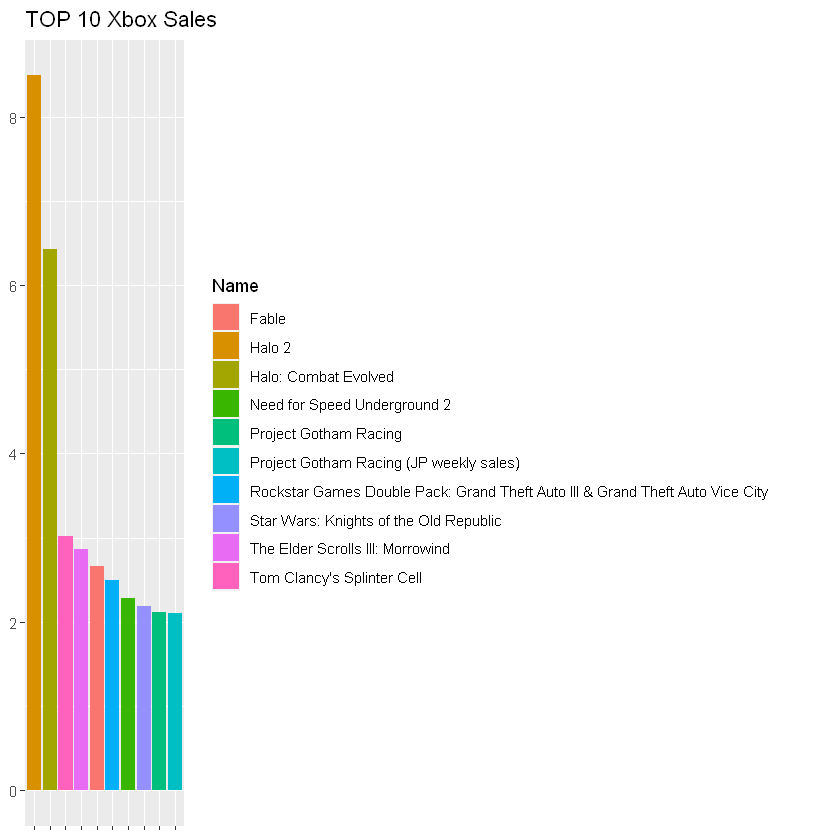

In [31]:
# View TOP 10 Xbox Sales
df_games %>%
filter(Platform=="XB") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank()) +
labs(x=NULL, y=NULL, title="TOP 10 Xbox Sales")

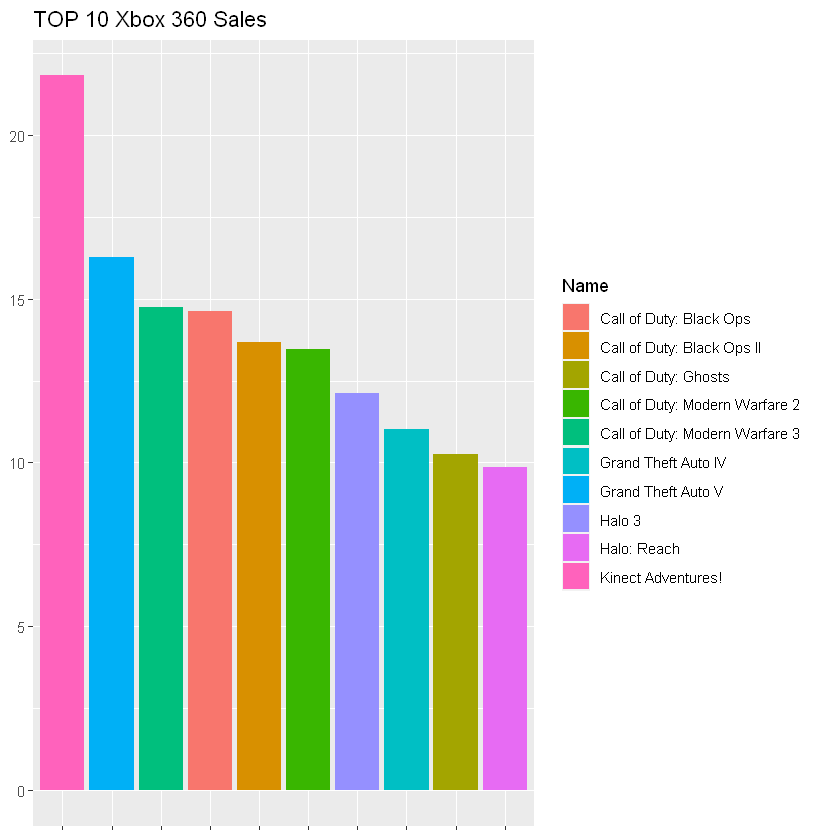

In [32]:
# View TOP 10 Xbox 360 Sales
df_games %>%
filter(Platform=="X360") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank()) +
labs(x=NULL, y=NULL, title="TOP 10 Xbox 360 Sales")

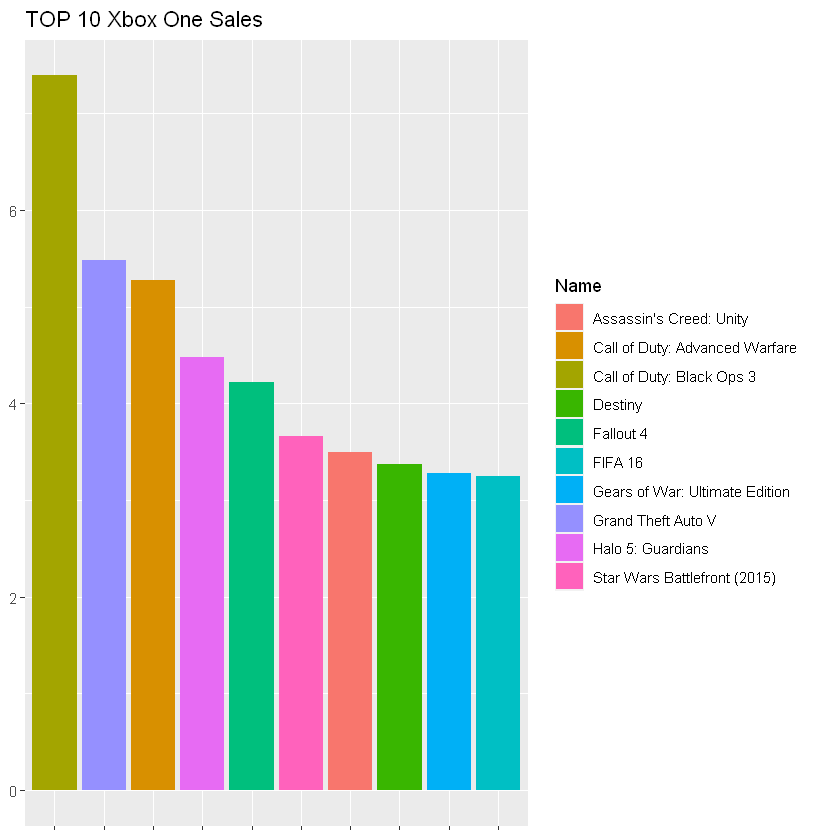

In [33]:
# View TOP 10 Xbox One Sales
df_games %>%
filter(Platform=="XOne") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank()) +
labs(x=NULL, y=NULL, title="TOP 10 Xbox One Sales")

### BEST SELLING PC GAMES

**PC**
1. The Sims 3
2. World of Warcraft
3. Diablo III

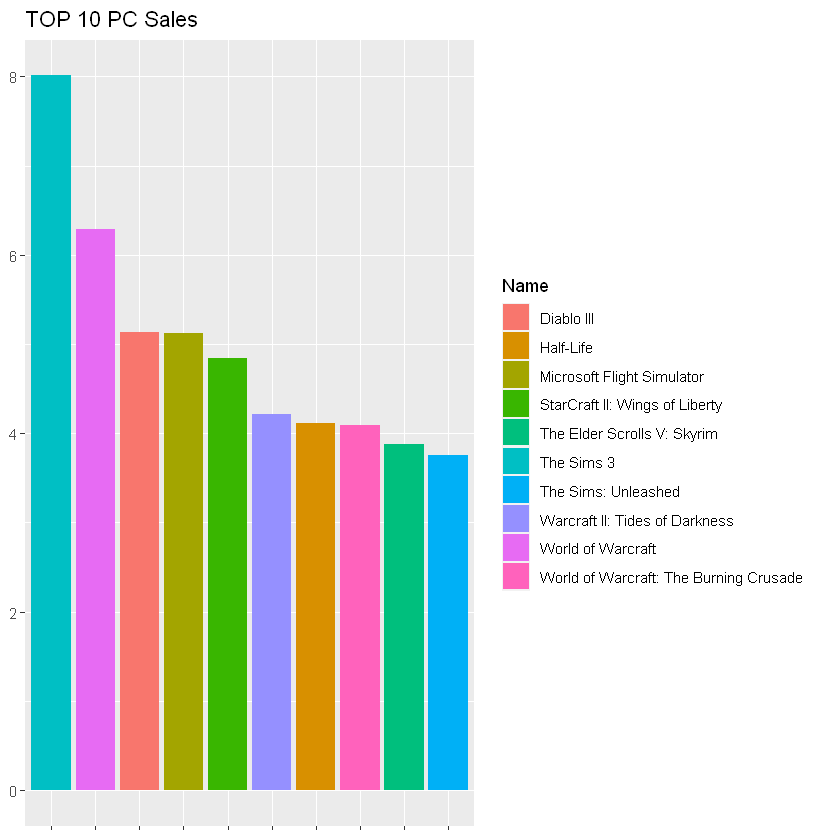

In [34]:
# View TOP 10 PC Sales
df_games %>%
filter(Platform=="PC") %>%
arrange(desc(Global_Sales)) %>%
head(n=10) %>%
 ggplot(aes(x = reorder(Name, -Global_Sales),
             y = Global_Sales, fill= Name)) +
  geom_col() +
 theme(axis.text.x = element_blank()) +
labs(x=NULL, y=NULL, title="TOP 10 PC Sales")

DIEGO RAMIREZ <br>
daarfarias@hotmail.com <br>
https://github.com/daarfarias <br>
Dataset: https://www.kaggle.com/sidtwr/videogames-sales-dataset